In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading California Housing Price Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()

In [4]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
# Description of the Dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


# Inspecting the dataset

In [8]:
# Converting the California housing dataset’s feature data into a Pandas DataFrame.
df = pd.DataFrame(california.data, columns = california.feature_names)

In [9]:
df.shape

(20640, 8)

In [10]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
df['House_Value'] = california.target

In [13]:
# Create a new feature: approximate households
df['Households'] = df['Population'] / df['AveOccup']

# Now create engineered features
df['Rooms_per_household'] = df['AveRooms'] / df['Households']
df['Bedrooms_per_room'] = df['AveBedrms'] / df['AveRooms']
df['Population_per_household'] = df['Population'] / df['Households']


In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Value,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0,0.055430,0.146591,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0,0.005482,0.155797,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,177.0,0.046826,0.129516,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,219.0,0.026563,0.184458,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,259.0,0.024254,0.172096,2.181467


In [15]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Value,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,330.0,0.015289,0.224625,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,114.0,0.053632,0.215208,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,433.0,0.012022,0.215173,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,349.0,0.015271,0.219892,2.123209
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894,530.0,0.009915,0.221185,2.616981


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MedInc                    20640 non-null  float64
 1   HouseAge                  20640 non-null  float64
 2   AveRooms                  20640 non-null  float64
 3   AveBedrms                 20640 non-null  float64
 4   Population                20640 non-null  float64
 5   AveOccup                  20640 non-null  float64
 6   Latitude                  20640 non-null  float64
 7   Longitude                 20640 non-null  float64
 8   House_Value               20640 non-null  float64
 9   Households                20640 non-null  float64
 10  Rooms_per_household       20640 non-null  float64
 11  Bedrooms_per_room         20640 non-null  float64
 12  Population_per_household  20640 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


In [17]:
# Summarizing the stats of dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Value,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,499.539680,0.025028,0.213075,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,382.329753,0.174101,0.058023,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,1.000000,0.000746,0.100000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,280.000000,0.008140,0.175426,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,409.000000,0.012683,0.203181,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,605.000000,0.019576,0.239834,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,6082.000000,12.900826,1.000000,1243.333333


In [18]:
# Checking Missing values
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Value,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

MedInc                      0
HouseAge                    0
AveRooms                    0
AveBedrms                   0
Population                  0
AveOccup                    0
Latitude                    0
Longitude                   0
House_Value                 0
Households                  0
Rooms_per_household         0
Bedrooms_per_room           0
Population_per_household    0
dtype: int64

In [20]:
# Checking the duplicated values
df.duplicated().sum()

0

# Exploratorary Data Analysis (EDA)

In [21]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Value,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075,0.013033,0.031303,-0.615479,0.018766
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623,-0.302916,0.002945,0.136367,0.013191
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948,-0.080598,0.536342,-0.418704,-0.004852
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701,-0.054833,0.563300,0.055817,-0.006181
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650,0.907222,-0.097038,0.037075,0.069863
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737,-0.027309,0.046549,0.002881,1.000000
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160,-0.071035,0.037305,-0.114302,0.002366
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967,0.055310,-0.010480,0.092868,0.002476
House_Value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000,0.065843,0.011616,-0.255624,-0.023737
Households,0.013033,-0.302916,-0.080598,-0.054833,0.907222,-0.027309,-0.071035,0.055310,0.065843,1.000000,-0.106274,0.067022,-0.027309


In [22]:
# AveBedrms (high correlation with AveRooms) and Population, AveOccup, Longitude (low correlation with target)
dataset = df.drop(['AveBedrms', 'Population', 'Longitude', 'AveOccup'], axis=1)

In [23]:
dataset.head()

,MedInc,HouseAge,AveRooms,Latitude,House_Value,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household
0,8.3252,41.0,6.984127,37.88,4.526,126.0,0.055430,0.146591,2.555556
1,8.3014,21.0,6.238137,37.86,3.585,1138.0,0.005482,0.155797,2.109842
2,7.2574,52.0,8.288136,37.85,3.521,177.0,0.046826,0.129516,2.802260
3,5.6431,52.0,5.817352,37.85,3.413,219.0,0.026563,0.184458,2.547945
4,3.8462,52.0,6.281853,37.85,3.422,259.0,0.024254,0.172096,2.181467


In [24]:
# Suppose df is your DataFrame with columns in any order
cols = list(dataset.columns)              # Get list of all columns
cols.remove('House_Value')           # Remove 'House_Value' from the list
cols.append('House_Value')           # Add 'House_Value' at the end
dataset = dataset[cols]                       # Reorder DataFrame columns


In [25]:
dataset.head()

,MedInc,HouseAge,AveRooms,Latitude,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household,House_Value
0,8.3252,41.0,6.984127,37.88,126.0,0.055430,0.146591,2.555556,4.526
1,8.3014,21.0,6.238137,37.86,1138.0,0.005482,0.155797,2.109842,3.585
2,7.2574,52.0,8.288136,37.85,177.0,0.046826,0.129516,2.802260,3.521
3,5.6431,52.0,5.817352,37.85,219.0,0.026563,0.184458,2.547945,3.413
4,3.8462,52.0,6.281853,37.85,259.0,0.024254,0.172096,2.181467,3.422


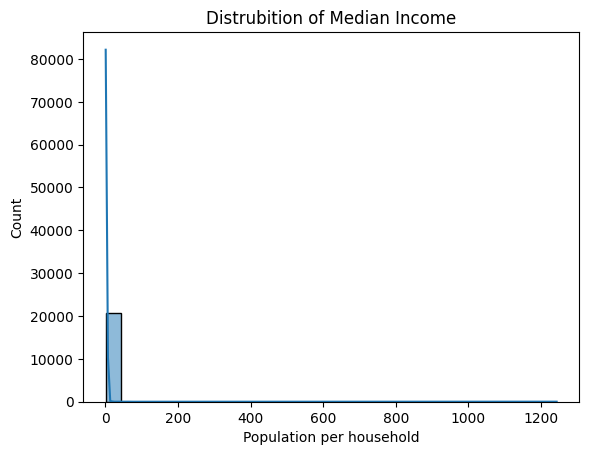

In [26]:
sns.histplot(dataset['Population_per_household'], bins =30, kde=True)
plt.title("Distrubition of Median Income")
plt.xlabel("Population per household")
plt.ylabel("Count")
plt.show()

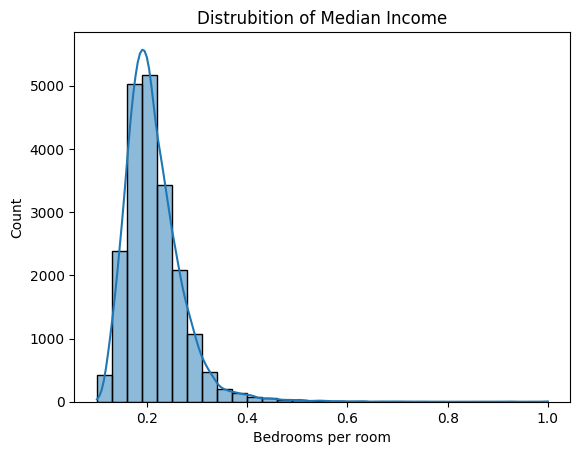

In [27]:
sns.histplot(dataset['Bedrooms_per_room'], bins =30, kde=True)
plt.title("Distrubition of Median Income")
plt.xlabel("Bedrooms per room")
plt.ylabel("Count")
plt.show()

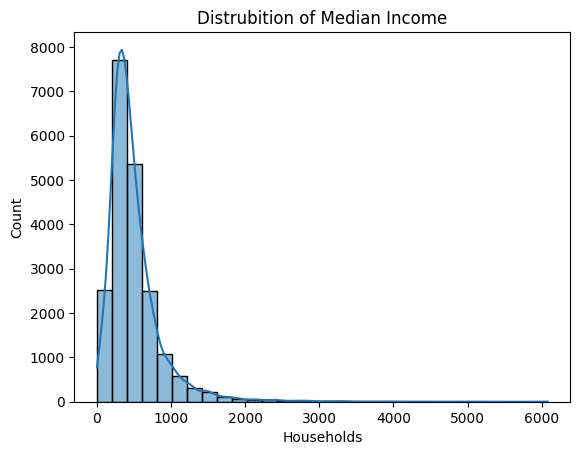

In [28]:
sns.histplot(dataset['Households'], bins =30, kde=True)
plt.title("Distrubition of Median Income")
plt.xlabel("Households")
plt.ylabel("Count")
plt.show()

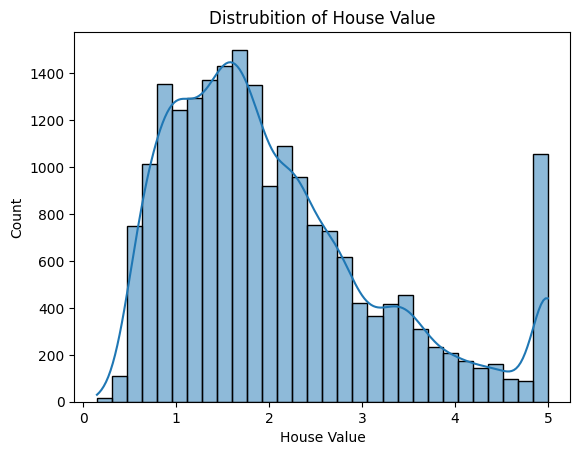

In [29]:
# Visualize distribution of target variable to check skewness or outliers
sns.histplot(dataset['House_Value'],bins=30,kde=True)
plt.title("Distrubition of House Value")
plt.xlabel("House Value")
plt.ylabel("Count")
plt.show()

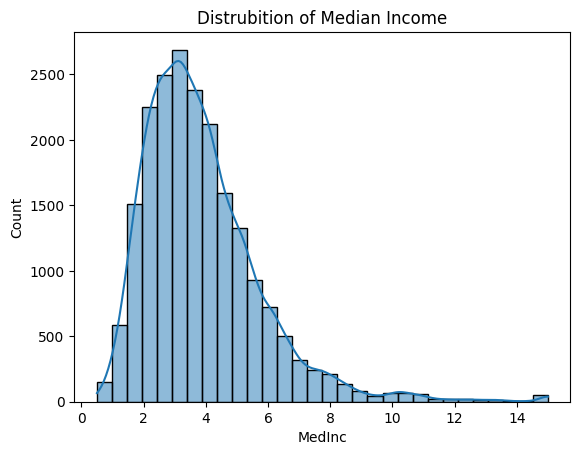

In [30]:
sns.histplot(dataset['MedInc'], bins =30, kde=True)
plt.title("Distrubition of Median Income")
plt.xlabel("MedInc")
plt.ylabel("Count")
plt.show()

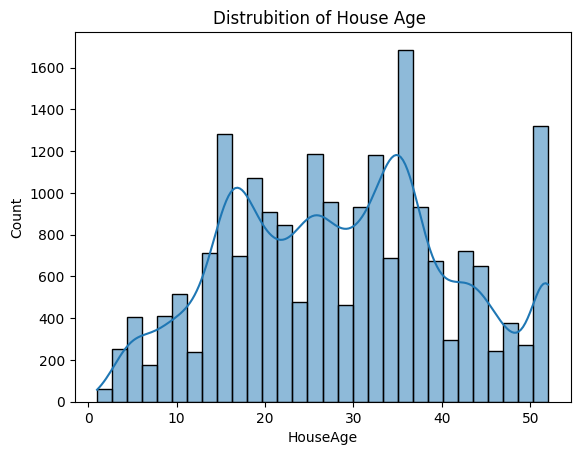

In [31]:
sns.histplot(dataset['HouseAge'], bins =30, kde =True)
plt.title("Distrubition of House Age ")
plt.xlabel("HouseAge")
plt.ylabel("Count")
plt.show()

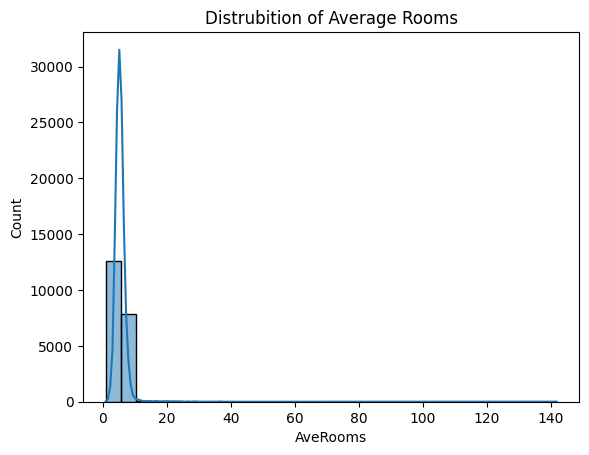

In [32]:
sns.histplot(dataset['AveRooms'], bins =30, kde =True)
plt.title('Distrubition of Average Rooms')
plt.xlabel('AveRooms')
plt.ylabel('Count')
plt.show()

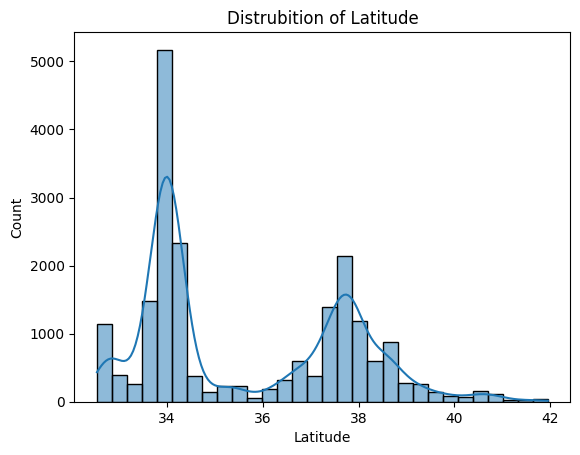

In [33]:
sns.histplot(dataset['Latitude'], bins =30, kde=True)
plt.title('Distrubition of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.show()

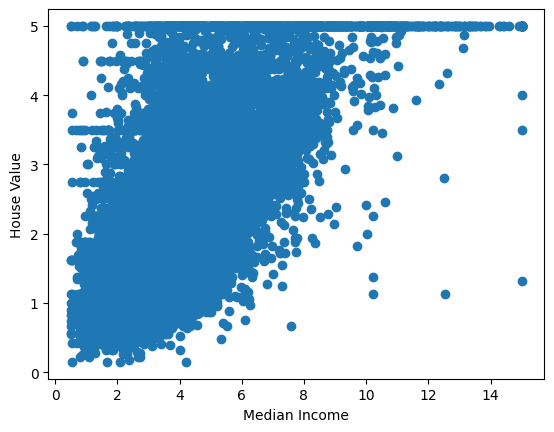

In [34]:
plt.scatter(dataset['MedInc'], dataset['House_Value'])
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.show()

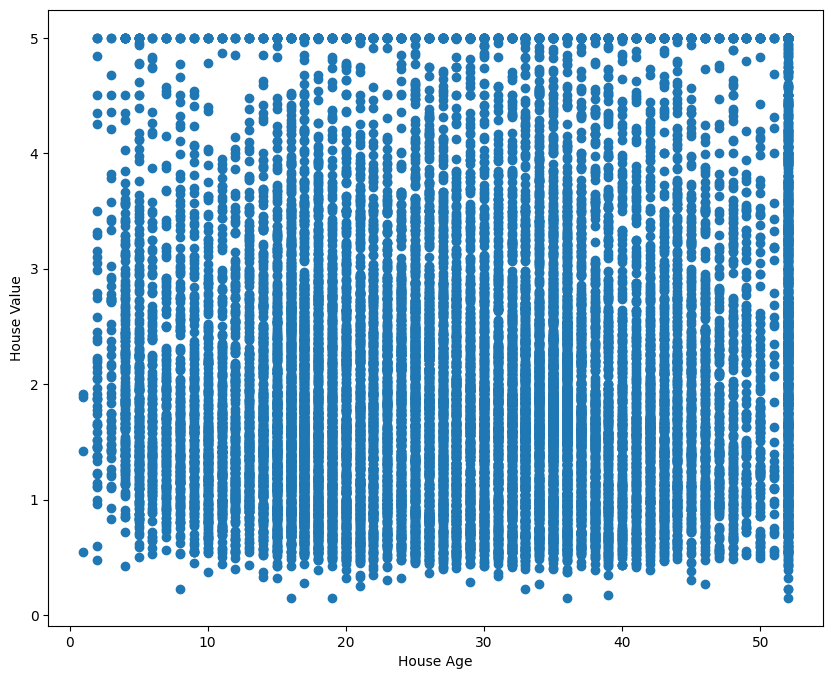

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(dataset['HouseAge'], dataset['House_Value'])
plt.xlabel('House Age')
plt.ylabel('House Value')
plt.show()

<AxesSubplot:xlabel='MedInc', ylabel='House_Value'>

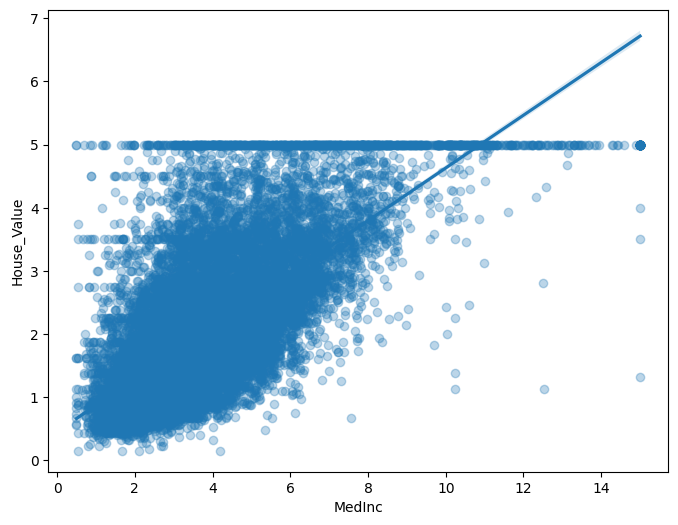

In [36]:
plt.figure(figsize=(8,6))
sns.regplot(x="MedInc", y="House_Value", data=dataset, scatter_kws={'alpha':0.3})

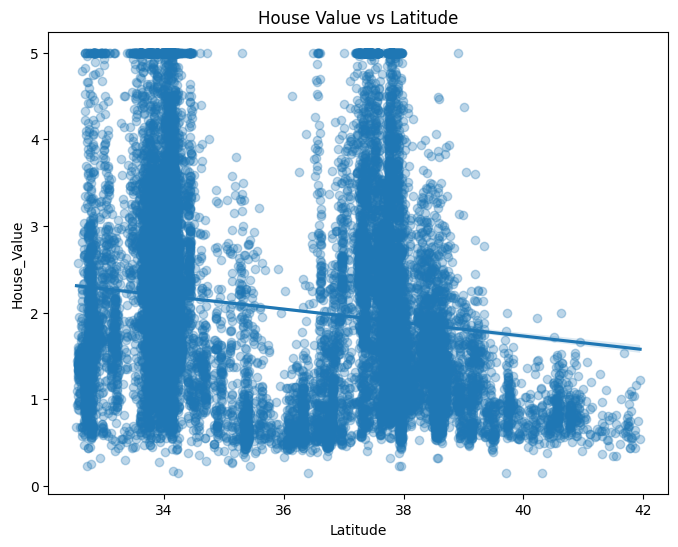

In [37]:
plt.figure(figsize=(8,6))
sns.regplot(x="Latitude", y="House_Value", data=dataset, scatter_kws={'alpha':0.3})
plt.title("House Value vs Latitude")
plt.show()


<AxesSubplot:xlabel='HouseAge', ylabel='House_Value'>

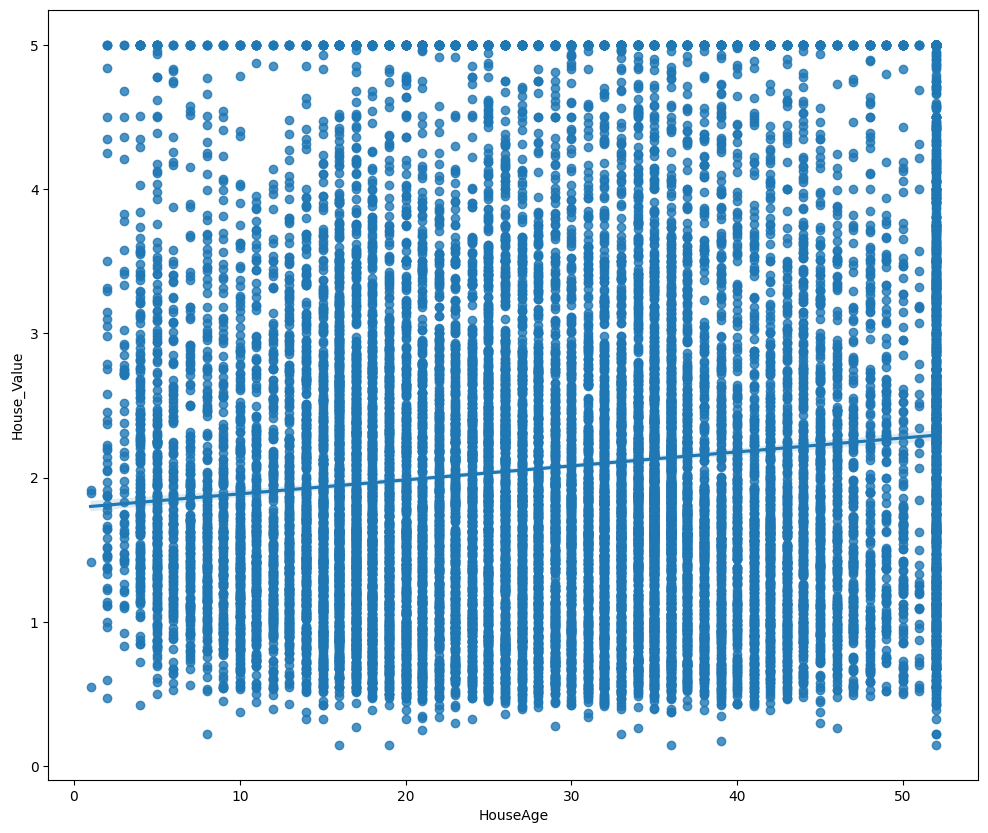

In [38]:
plt.figure(figsize=(12,10))
sns.regplot(x="HouseAge",y="House_Value",data=dataset)

<AxesSubplot:xlabel='Households', ylabel='House_Value'>

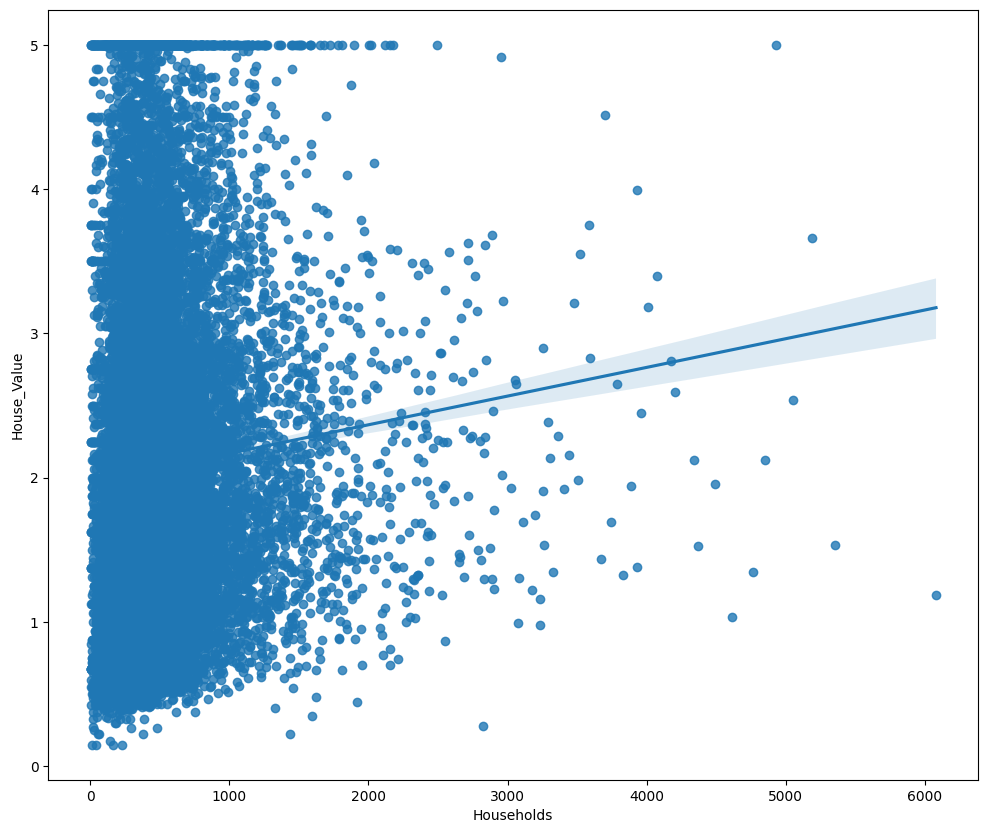

In [39]:
plt.figure(figsize=(12,10))
sns.regplot(x="Households",y="House_Value",data=dataset)

<AxesSubplot:xlabel='AveRooms', ylabel='House_Value'>

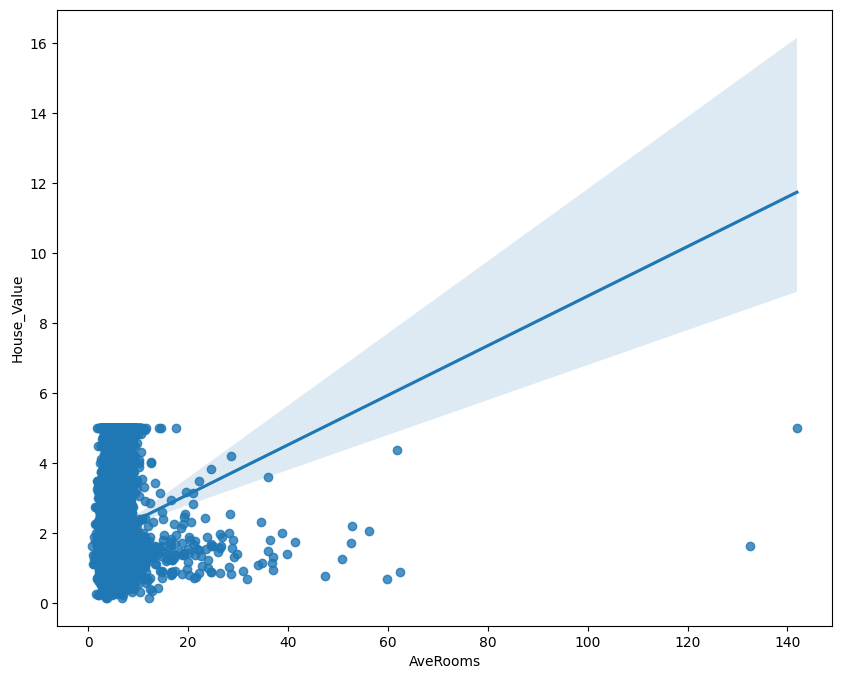

In [40]:
plt.figure(figsize=(10,8))
sns.regplot(x="AveRooms",y="House_Value",data=dataset)

In [41]:
dataset.corr()

,MedInc,HouseAge,AveRooms,Latitude,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household,House_Value
MedInc,1.000000,-0.119034,0.326895,-0.079809,0.013033,0.031303,-0.615479,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,0.011173,-0.302916,0.002945,0.136367,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.106389,-0.080598,0.536342,-0.418704,-0.004852,0.151948
Latitude,-0.079809,0.011173,0.106389,1.000000,-0.071035,0.037305,-0.114302,0.002366,-0.144160
Households,0.013033,-0.302916,-0.080598,-0.071035,1.000000,-0.106274,0.067022,-0.027309,0.065843
Rooms_per_household,0.031303,0.002945,0.536342,0.037305,-0.106274,1.000000,-0.027133,0.046549,0.011616
Bedrooms_per_room,-0.615479,0.136367,-0.418704,-0.114302,0.067022,-0.027133,1.000000,0.002881,-0.255624
Population_per_household,0.018766,0.013191,-0.004852,0.002366,-0.027309,0.046549,0.002881,1.000000,-0.023737
House_Value,0.688075,0.105623,0.151948,-0.144160,0.065843,0.011616,-0.255624,-0.023737,1.000000


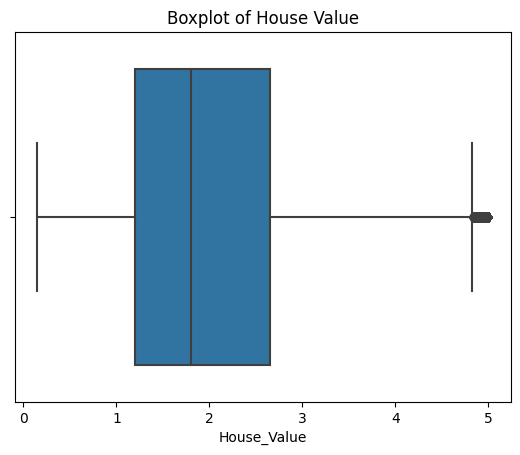

In [42]:
# Boxplots to detect outliers
sns.boxplot(x=dataset["House_Value"])
plt.title("Boxplot of House Value")
plt.show()

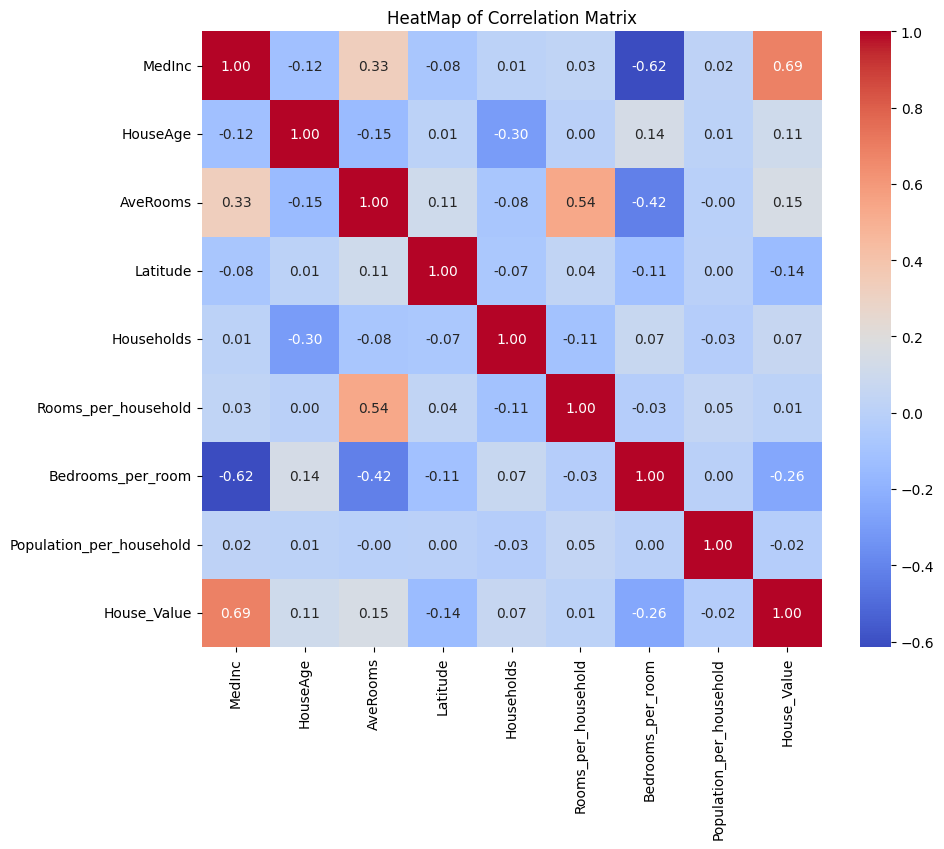

In [43]:
#correlations between features and target
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('HeatMap of Correlation Matrix')
plt.show()

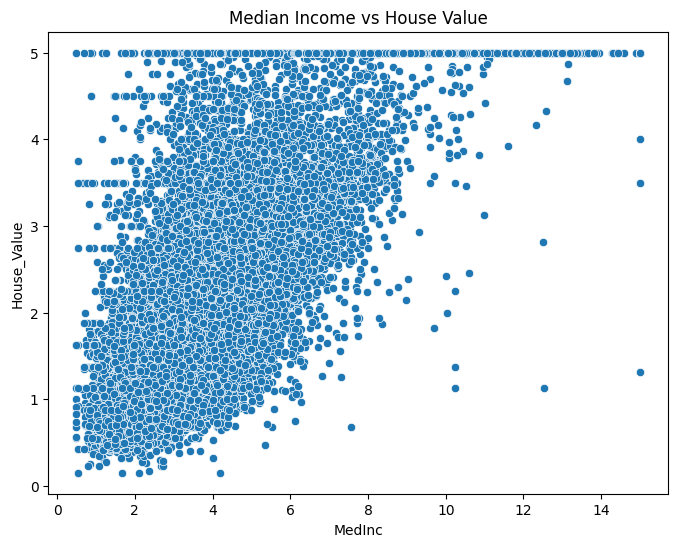

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc', y='House_Value', data=dataset)
plt.title('Median Income vs House Value')
plt.show()

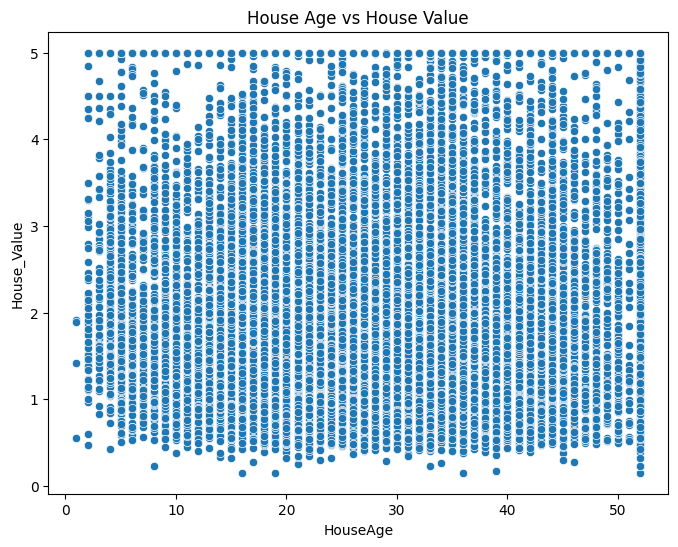

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='HouseAge', y='House_Value', data=dataset)
plt.title('House Age vs House Value')
plt.show()

# Model Training :

In [46]:
from sklearn.model_selection import train_test_split

X = dataset.drop('House_Value', axis=1)
y = dataset['House_Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
X_train

,MedInc,HouseAge,AveRooms,Latitude,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household
7061,4.1312,35.0,5.882353,33.93,408.0,0.014418,0.165833,2.985294
14689,2.8631,20.0,4.401210,32.79,496.0,0.008873,0.244617,2.014113
17323,4.2026,24.0,5.617544,34.59,285.0,0.019711,0.176140,2.564912
10056,3.1094,14.0,5.869565,39.26,138.0,0.042533,0.186420,2.188406
15750,3.3068,52.0,4.801205,37.77,664.0,0.007231,0.222083,2.298193
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,33.78,217.0,0.028244,0.151128,3.032258
11964,3.0500,33.0,6.868597,34.02,449.0,0.015298,0.184825,3.904232
5390,2.9344,36.0,3.986717,34.03,527.0,0.007565,0.270823,3.332068
860,5.7192,15.0,6.395349,37.58,559.0,0.011441,0.166993,3.178891


In [48]:
X_test

,MedInc,HouseAge,AveRooms,Latitude,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household
20046,1.6812,25.0,4.192201,36.06,359.0,0.011677,0.243854,3.877437
3024,2.5313,30.0,5.039384,35.14,584.0,0.008629,0.236833,2.679795
15663,3.4801,52.0,3.977155,37.80,963.0,0.004130,0.298172,1.360332
20484,5.7376,17.0,6.163636,34.28,495.0,0.012452,0.165520,3.444444
9814,3.7250,34.0,5.492991,36.62,428.0,0.012834,0.187154,2.483645
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,37.36,240.0,0.017483,0.243297,2.420833
13512,1.4891,41.0,4.551852,34.11,270.0,0.016859,0.245728,3.681481
10842,3.5120,16.0,3.762287,33.67,2116.0,0.001778,0.285894,2.369565
16559,3.6500,10.0,5.502092,37.82,1673.0,0.003289,0.192721,3.547519


In [49]:
# Standarize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [50]:
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ..., -0.07370522,
         0.52783735,  0.06127763],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.08989014,
         0.40752438, -0.03551561],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.11377771,
         1.45869325, -0.14215427],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.1262651 ,
         1.24827509, -0.06058827],
       [-0.11911302, -1.47269353,  0.02607207, ..., -0.118244  ,
        -0.34841959,  0.03461374],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.12438563,
         1.55620017, -0.0407528 ]])

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)  # You can tune n_estimators and max_depth

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [52]:
print(X_train.shape)
print(y_train.shape)


(14448, 8)
(14448,)


In [53]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

MedInc                      0.760565
Population_per_household    0.140789
HouseAge                    0.042048
Latitude                    0.022966
AveRooms                    0.016891
Bedrooms_per_room           0.010937
Households                  0.003624
Rooms_per_household         0.002180
dtype: float64


In [54]:
# Print model parameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [55]:
# Prediction with test data
predict = rf.predict(X_test)

In [56]:
predict

array([1.06301288, 1.31574729, 3.51451354, ..., 1.87097959, 1.65904907,
       1.76676367])

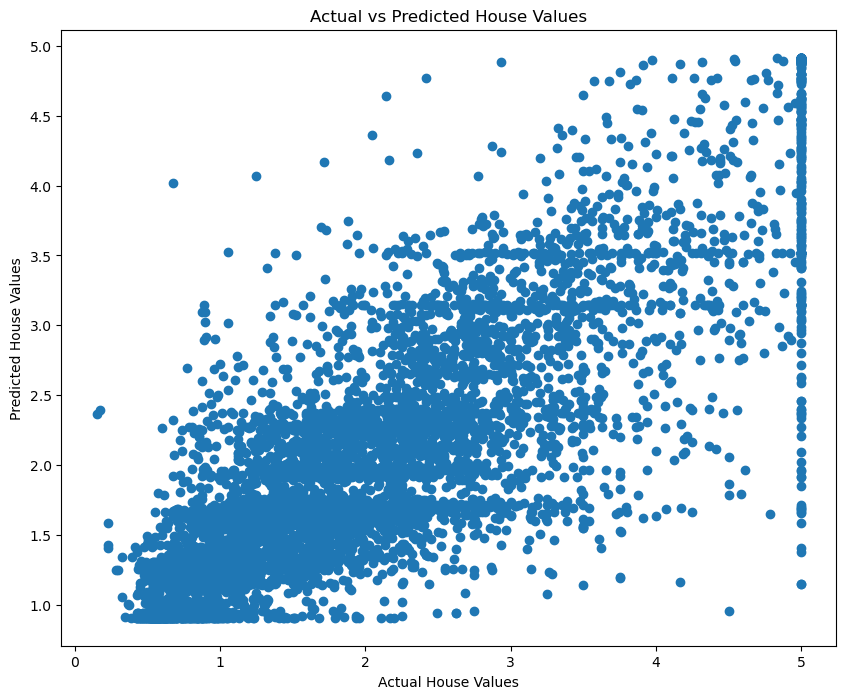

In [57]:
# Plotting Actual vs Predicted values to visually assess the model's performance
plt.figure(figsize=(10,8))
plt.scatter(y_test, predict)
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()


In [58]:
#residuals
residuals = y_test- predict
print(residuals)

20046   -0.586013
3024    -0.857747
15663    1.485496
20484   -0.205937
9814     1.117109
           ...   
17505    0.670101
13512   -0.477952
10842    0.313020
16559   -0.465049
5786     0.331236
Name: House_Value, Length: 6192, dtype: float64


D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


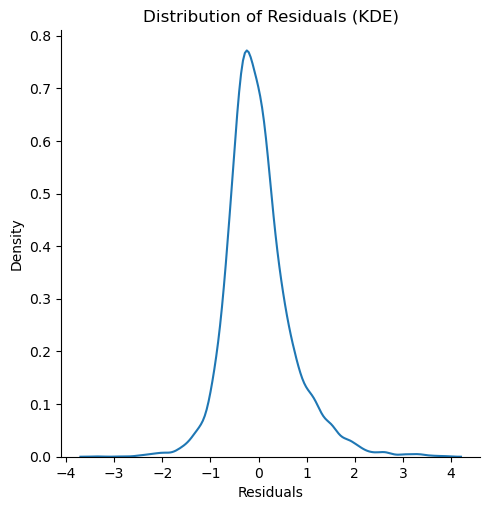

In [59]:
# Plotting the distribution of residuals using Kernel Density Estimate (KDE)
# This helps assess whether the residuals follow a normal distribution.
sns.displot(residuals, kind="kde")
plt.title("Distribution of Residuals (KDE)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

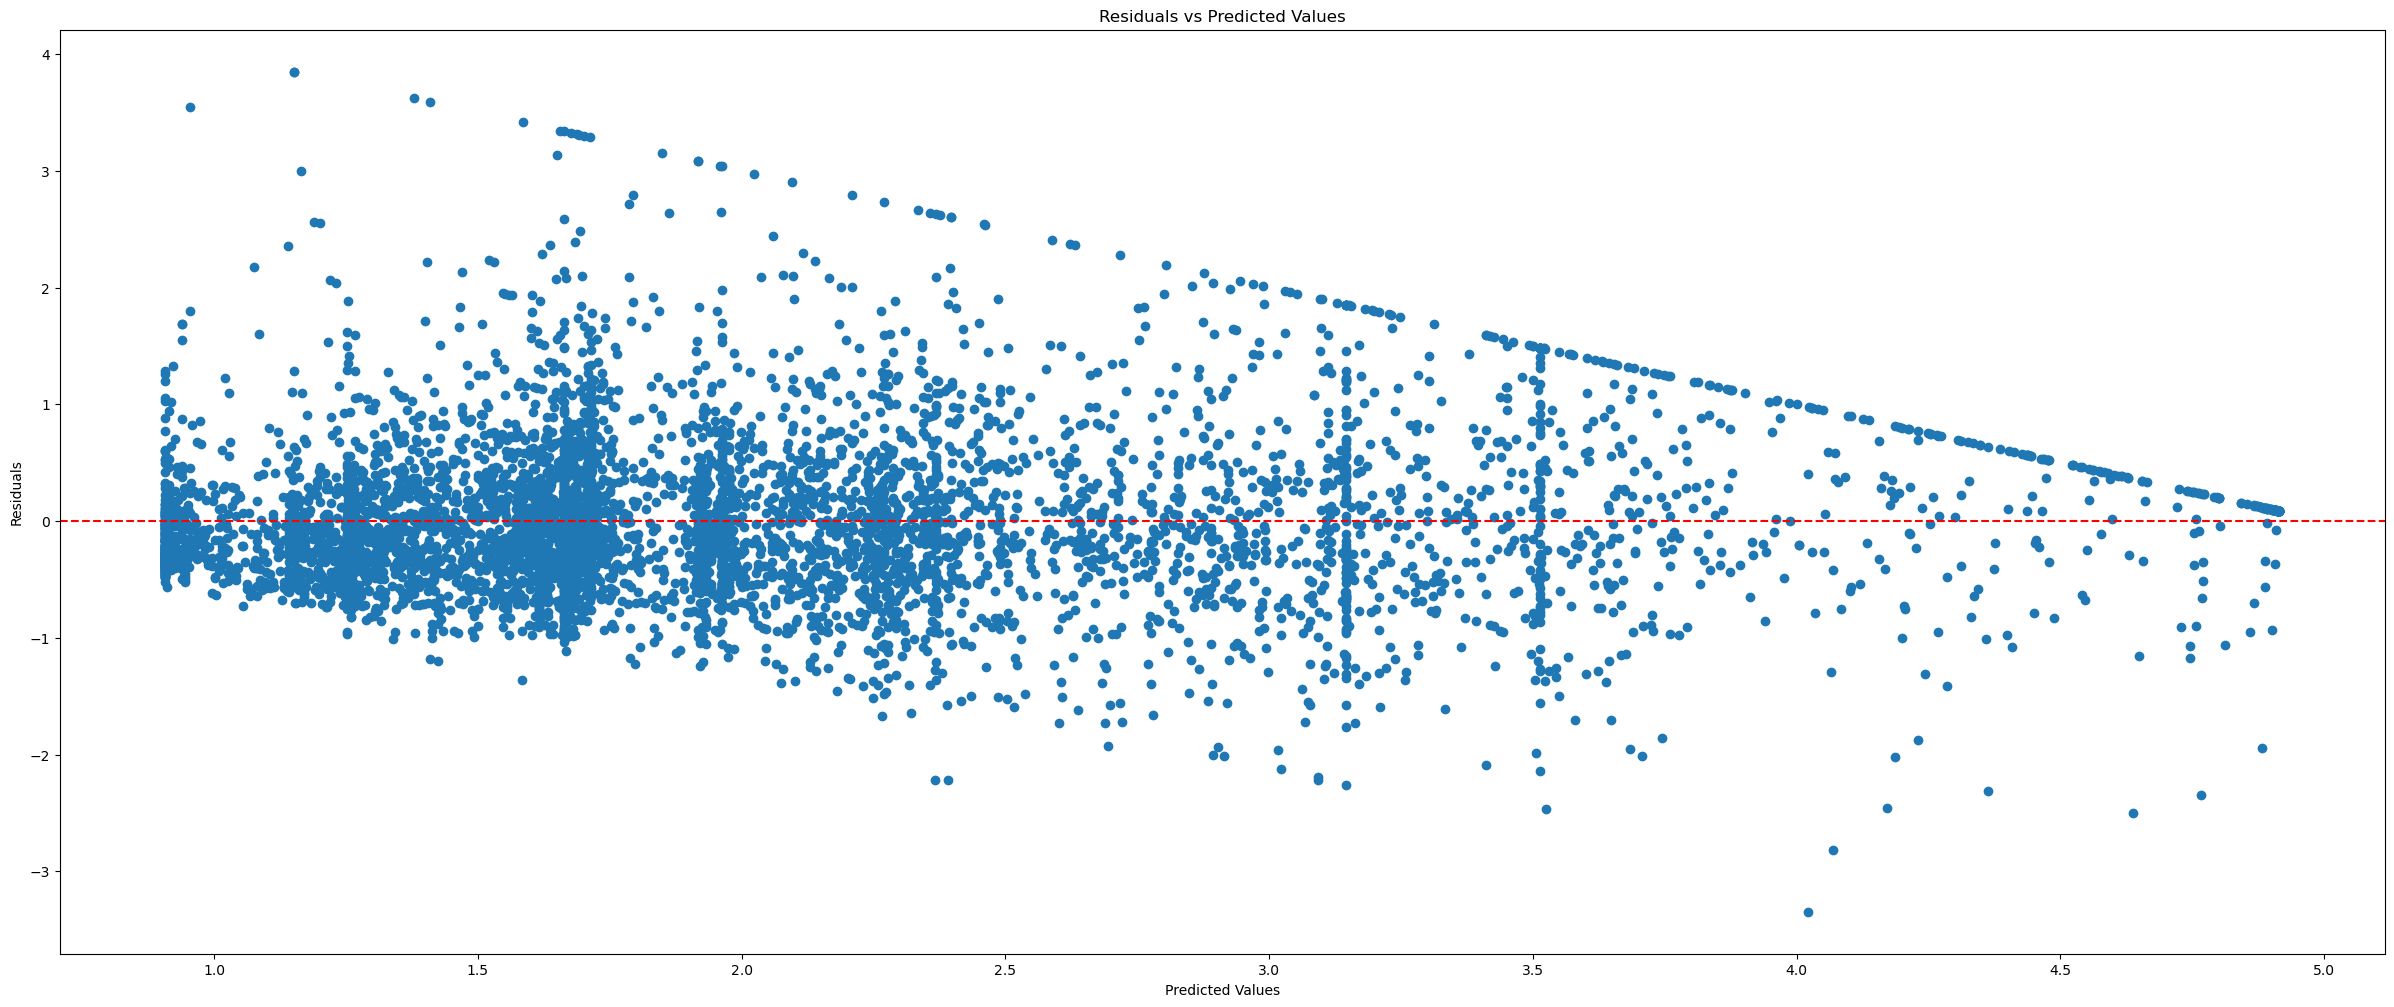

In [60]:
# Plotting Residuals vs Predicted Values to check for patterns.
# A good model should show residuals scattered randomly around 0 without clear patterns.
plt.figure(figsize=(30, 12))
plt.scatter(predict, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Adds a horizontal line at y=0 for reference
plt.show()


In [61]:
# Evaluate model performance

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Mean Squared Error (penalizes larger errors more)
print(mean_squared_error(y_test, predict))

# Mean Absolute Error (average magnitude of errors)
print(mean_absolute_error(y_test, predict))

# Root Mean Squared Error (easier to interpret, same scale as target)
print(np.sqrt(mean_squared_error(y_test, predict)))

0.4624016502368774
0.49564212574997873
0.680001213408386


# R square and Adjusted R square

In [62]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predict)
print(score)

0.6477047463280623


In [63]:
# display adjusted R square
1- (1- score) * (len(y_test)- 1) / (len(y_test)-X_test.shape[1]-1)

0.647248921966203

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting R2 Score: 0.7133507976984477


In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(GradientBoostingRegressor(random_state=42),
                    param_grid,
                    cv=3,
                    scoring='r2',
                    verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best R2 Score on CV:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test R2 with Best Model:", r2_score(y_test, y_pred_best))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best R2 Score on CV: 0.7391822163798238
Test R2 with Best Model: 0.7415965795793158


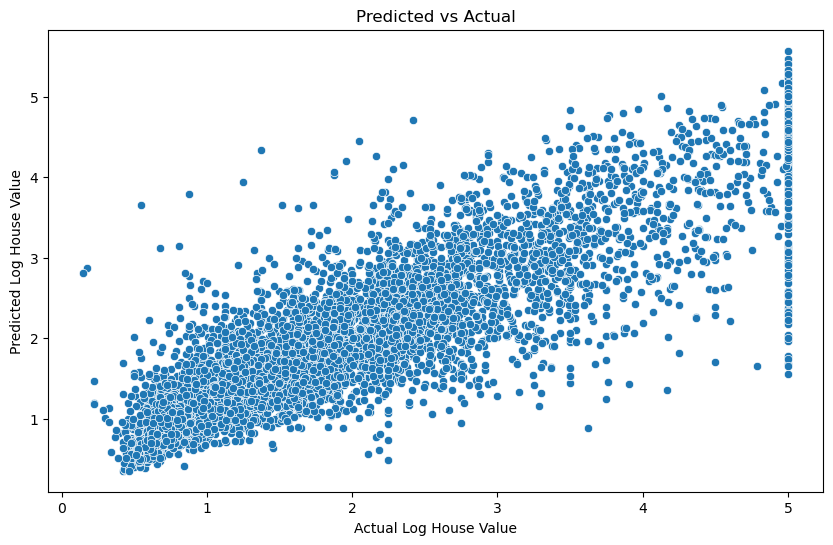

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual Log House Value")
plt.ylabel("Predicted Log House Value")
plt.title("Predicted vs Actual")
plt.show()


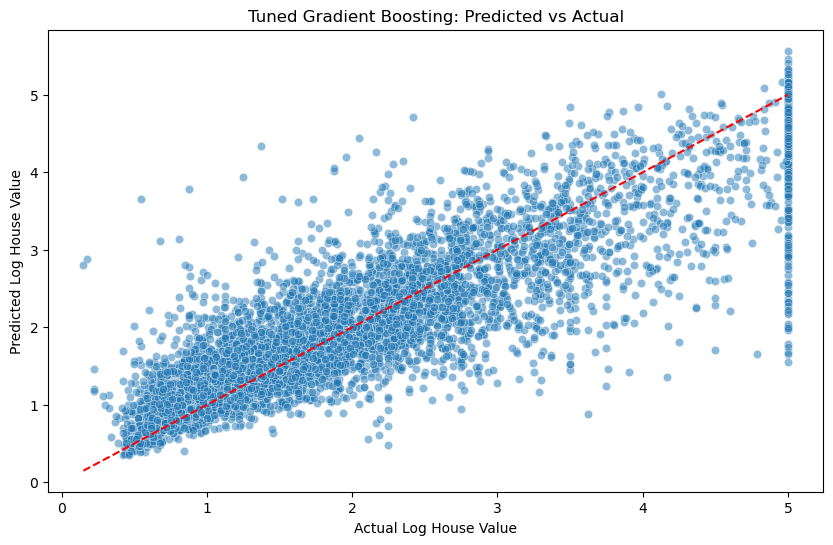

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.xlabel("Actual Log House Value")
plt.ylabel("Predicted Log House Value")
plt.title("Tuned Gradient Boosting: Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


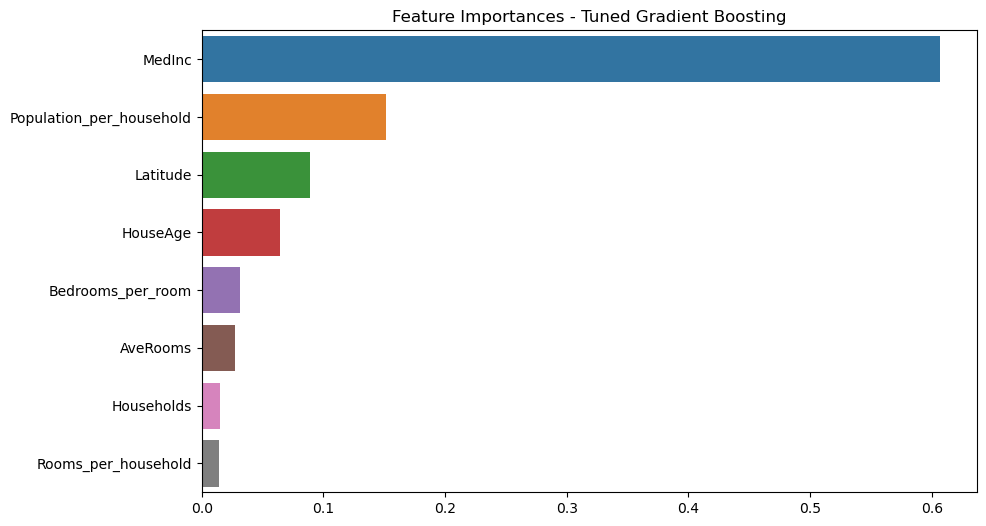

In [68]:
importances = best_model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances - Tuned Gradient Boosting")
plt.show()


In [69]:
# Prediction of new Data
# Suppose dataset is your full dataframe
sample_df = dataset.iloc[[0], :-1]  # Select first row, all columns except target, as a DataFrame

scaled_sample = scaler.transform(sample_df)
prediction = rf.predict(scaled_sample)
prediction

array([4.43641947])

# Pickling the Model file for deployment

In [70]:
import pickle

In [71]:
pickle.dump(rf,open('rfmodel.pkl', 'wb'))

In [72]:
pickled_model = pickle.load(open('rfmodel.pkl','rb'))

In [73]:
# Prediction
pickled_model.predict(scaled_sample) 

array([4.43641947])

In [74]:
dataset.head()

,MedInc,HouseAge,AveRooms,Latitude,Households,Rooms_per_household,Bedrooms_per_room,Population_per_household,House_Value
0,8.3252,41.0,6.984127,37.88,126.0,0.055430,0.146591,2.555556,4.526
1,8.3014,21.0,6.238137,37.86,1138.0,0.005482,0.155797,2.109842,3.585
2,7.2574,52.0,8.288136,37.85,177.0,0.046826,0.129516,2.802260,3.521
3,5.6431,52.0,5.817352,37.85,219.0,0.026563,0.184458,2.547945,3.413
4,3.8462,52.0,6.281853,37.85,259.0,0.024254,0.172096,2.181467,3.422
